### Jupyter Notebook for Section 1 - Data exploration and pre-processing

In [ ]:
# Imports of useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Dataset loading
df=pd.read_csv('RTP_traffic_dataset.csv')

In [ ]:
# Display of first row of dataset for reference
df.head(1)

### <ins>Point 1.</ins>

In the first point, the questions to be answered are: 
-  When did the whole traffic collection start and end in time?
-  How many videoteleconferencing calls are there in total?
-  What is the total duration of all calls, and what is their average duration?

We will address each question in the requested order with a code and markdown cells for each one of them, providing this way a short explanation of the procedure and the related code implementation.

The first question requests to find the start and end in time of the data collection. Thanks to the prior knowledge of the dataset, this task is performed by applying the max() and min() methods to the 'timestamp' column. This approach works as long as the time format is consistent along the dataset and since it's the case, we display below the obtained results:

In [4]:
t_end = df['timestamp'].max()
t_start = df['timestamp'].min()
print('The starting time of the data collection is:',t_start)
print('The finishing time of the data collection is:',t_end)

The starting time of the data collection is: 2020-04-17 07:59:45.500
The finishing time of the data collection is: 2021-01-18 15:03:18.000


The second question...

In [5]:
df['timestamp']=pd.to_datetime(df['timestamp'])
Durations=[]
P1=df['n_call'].value_counts().sort_index()
for i in P1.index:
    filt=df['n_call']==i
    P=df[filt]
    DurationCalls=P['timestamp'].max()-P['timestamp'].min()
    Durations.append(DurationCalls)
print(Durations)
len(Durations)
print(np.array(Durations).mean())


[Timedelta('0 days 00:44:26'), Timedelta('0 days 00:54:39.500000'), Timedelta('0 days 01:16:52'), Timedelta('0 days 00:56:18'), Timedelta('0 days 00:48:08.500000'), Timedelta('0 days 00:55:38.500000'), Timedelta('0 days 00:58:02.500000'), Timedelta('0 days 01:04:15.500000'), Timedelta('0 days 00:28:59'), Timedelta('0 days 00:05:21.500000'), Timedelta('0 days 00:48:19.500000'), Timedelta('0 days 00:31:35.500000'), Timedelta('0 days 01:12:43.500000'), Timedelta('0 days 00:05:40'), Timedelta('0 days 00:40:01'), Timedelta('0 days 00:36:18.500000'), Timedelta('0 days 01:02:21'), Timedelta('0 days 02:06:45'), Timedelta('0 days 00:56:11'), Timedelta('0 days 01:02:51.500000'), Timedelta('0 days 01:00:55'), Timedelta('0 days 01:46:49'), Timedelta('0 days 01:23:15'), Timedelta('0 days 01:12:26'), Timedelta('0 days 02:06:53'), Timedelta('0 days 00:47:03'), Timedelta('0 days 00:38:59.500000'), Timedelta('0 days 01:19:12'), Timedelta('0 days 01:20:08.500000'), Timedelta('0 days 01:18:55'), Timedelt

In [103]:
print('The number of calls is:',len(P1))

The number of calls is: 68


### <ins>Point 2.</ins>

In [6]:
# Delete equal statistical attributes
print('Are there one attribute features?')
stat_feat= df.iloc[:,1:74].columns
count_zero_feats = np.count_nonzero(df[stat_feat], axis=0)
any(count_zero_feats==1)

Are there one attribute features?


False

### <ins>Point 3.</ins>

### <ins>Ask if our 3 plots are statistically meaningful.</ins>

In [7]:
filt2=df['num_packet_loss']==0
df['label']=1
df.loc[filt2,'label']=0

In [8]:
Count_lossy=df['label'].sum()
Count_lossless= len(df['label'])-Count_lossy
print('The lossy transmissions are:',Count_lossy,'The lossless are:',Count_lossless,'out of ',len(df),'time windows')

The lossy transmissions are: 32479 The lossless are: 2105448 out of  2137927 time windows


In [ ]:
array_1=df['label']==0
array_2=df['label']==1
for i in stat_feat:
    plt.figure()
    plt.hist([np.array(df[array_1][i]), np.array(df[array_2][i])], density=True)
    plt.xlabel(i)
    plt.legend(['0','1'])
    plt.show()

### <ins>Point 4.</ins>

### <ins>To be asked: how can we determine a reasonable threshold?</ins>

In [9]:
outliers_to_delete = df['num_packet_loss'] < df['num_packets'] 
df_no_outliers = df[outliers_to_delete]


In [10]:
outliers_to_delete = df['num_packet_loss'] > df['num_packets'] 

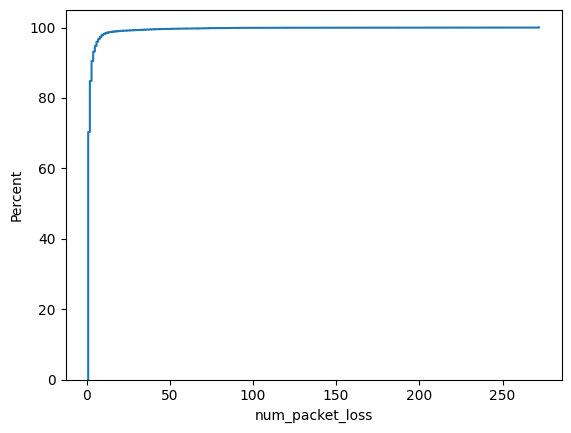

In [25]:
#correct ECDF
array_2=df_no_outliers['label']==1
df_lossy=df_no_outliers[array_2]

g=sns.ecdfplot(
    data = df_lossy,
    x = 'num_packet_loss' ,
    stat= 'percent'
)


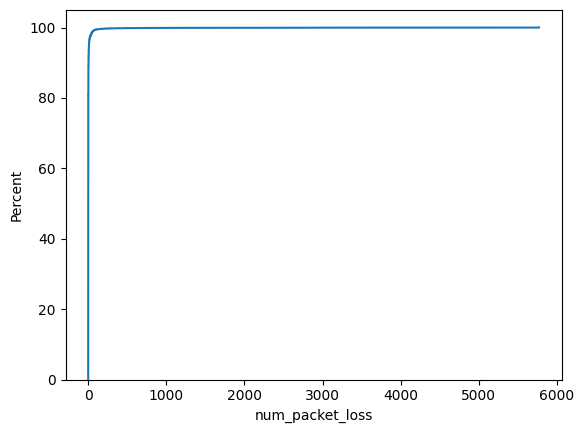

In [23]:
#old ECDF
array_2=df['label']==1
df_lossy=df[array_2]

g=sns.ecdfplot(
    data = df_lossy,
    x = 'num_packet_loss', 
    stat='percent'
)


In [11]:
df = df_no_outliers

### <ins>Point 5.</ins>

In [12]:
df['timestamp']=pd.to_datetime(df['timestamp'])
C2=df.groupby('software')
print(f'Number of Webex time windows: {len(C2.get_group('webex'))}')
print(f'Number of Webex calls: {len(set(C2.get_group('webex')['n_call']))}')

print(f'Number of Jitsi time windows: {len(C2.get_group('webrtc'))}')
print(f'Number of Jitsi calls: {len(set(C2.get_group('webrtc')['n_call']))}')


Number of Webex time windows: 806377
Number of Webex calls: 21
Number of Jitsi time windows: 1329891
Number of Jitsi calls: 47


In [33]:
Time_webex=[]
for el in set(C2.get_group('webex')['n_call']):
    R=sorted(C2.get_group('webex')[C2.get_group('webex')['n_call']==el]['timestamp']) #n_60 messi a caso
    Time_webex.append(R[len(R)-1]-R[0])

Time_jitsi=[]
for el in set(C2.get_group('webrtc')['n_call']):
    R=sorted(C2.get_group('webrtc')[C2.get_group('webrtc')['n_call']==el]['timestamp']) #n_60 messi a caso
    Time_jitsi.append(R[len(R)-1]-R[0])

print(Time_webex)
print(Time_jitsi)

[Timedelta('0 days 00:08:49'), Timedelta('0 days 01:13:07.500000'), Timedelta('0 days 00:37:27'), Timedelta('0 days 01:12:30.500000'), Timedelta('0 days 01:15:02'), Timedelta('0 days 01:14:55.500000'), Timedelta('0 days 01:18:05'), Timedelta('0 days 01:00:13'), Timedelta('0 days 02:14:58.500000'), Timedelta('0 days 00:49:21'), Timedelta('0 days 00:01:20.500000'), Timedelta('0 days 00:12:58.500000'), Timedelta('0 days 01:33:14'), Timedelta('0 days 00:27:17'), Timedelta('0 days 00:55:54.500000'), Timedelta('0 days 01:28:05'), Timedelta('0 days 00:53:20'), Timedelta('0 days 00:23:41'), Timedelta('0 days 01:42:45.500000'), Timedelta('0 days 01:07:08.500000'), Timedelta('0 days 00:57:59')]
[Timedelta('0 days 00:44:26'), Timedelta('0 days 00:54:39.500000'), Timedelta('0 days 01:16:52'), Timedelta('0 days 00:56:18'), Timedelta('0 days 00:48:08.500000'), Timedelta('0 days 00:55:38.500000'), Timedelta('0 days 00:58:02.500000'), Timedelta('0 days 01:04:15.500000'), Timedelta('0 days 00:28:59'), 

In [34]:
print(f'The average time of calls in webex: {pd.Series(Time_webex).sum()/len(set(C2.get_group('webex')['n_call']))}')
print(f'The average time of calls in jitsi: {pd.Series(Time_jitsi).sum()/len(set(C2.get_group('webrtc')['n_call']))}')

The average time of calls in webex: 0 days 00:59:26.309523809
The average time of calls in jitsi: 0 days 00:58:17.244680851


In [ ]:
for i in stat_feat:
    plt.figure()
    plt.hist([np.array(C2.get_group('webex')[i]), np.array(C2.get_group('webrtc')[i])], density=True)
    plt.xlabel(i)
    plt.legend(['Webex','Jitsi'])
    plt.show()

### <ins> Point 6. </ins>

### <ins>ECDF correct?.</ins>

In [35]:
n_call_webex = random.sample(sorted(set(C2.get_group('webex')['n_call'])),3)
n_call_jitsi = random.sample(sorted(set(C2.get_group('webrtc')['n_call'])),2)

kbps_webex=[]
kbps_jitsi=[]
for el in n_call_webex:
    R=C2.get_group('webex')[C2.get_group('webex')['n_call']==el].sort_values(by=['timestamp']) #n_60 messi a caso
    kbps_webex = kbps_webex + [list(R['kbps'])]

for el in n_call_jitsi:
    R=C2.get_group('webrtc')[C2.get_group('webrtc')['n_call']==el].sort_values(by=['timestamp']) #n_60 messi a caso
    kbps_jitsi = kbps_jitsi + [list(R['kbps'])]


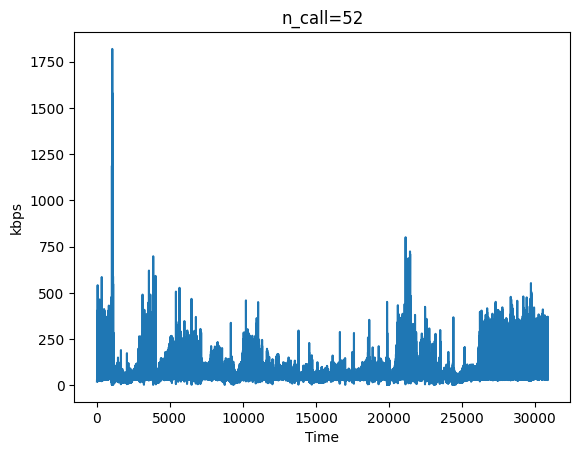

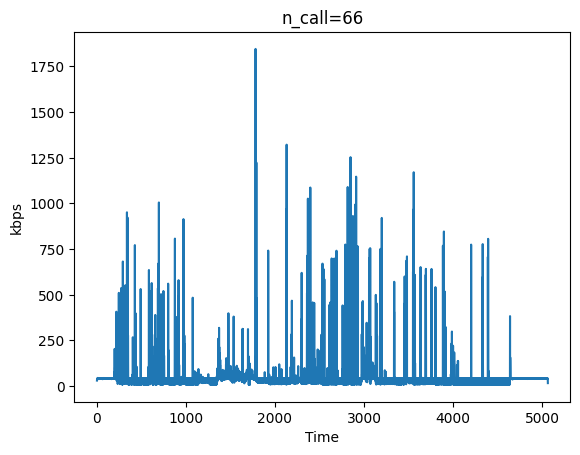

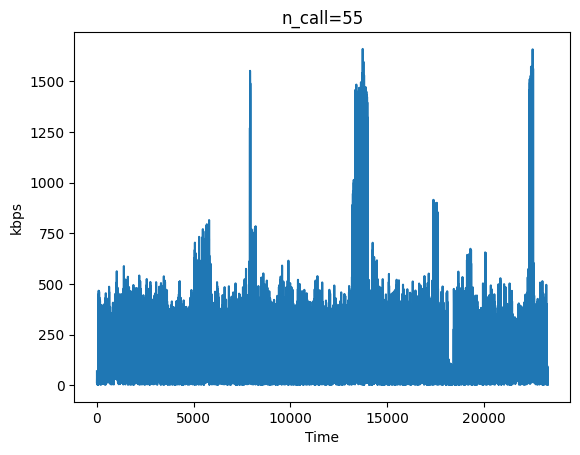

In [36]:
plt.plot(kbps_webex[0])
plt.title(f'n_call={n_call_webex[0]}')
plt.xlabel('Time')
plt.ylabel('kbps')
plt.show()
plt.plot(kbps_webex[1])
plt.title(f'n_call={n_call_webex[1]}')
plt.xlabel('Time')
plt.ylabel('kbps')
plt.show()
plt.plot(kbps_webex[2])
plt.title(f'n_call={n_call_webex[2]}')
plt.xlabel('Time')
plt.ylabel('kbps')
plt.show()

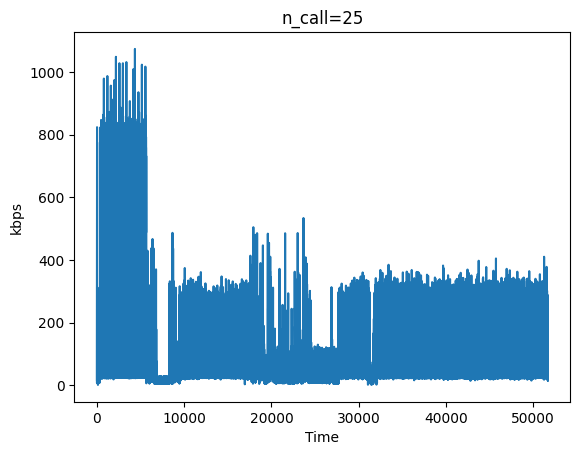

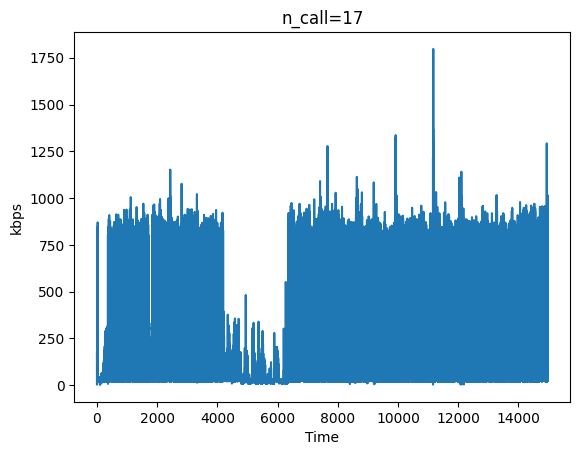

In [37]:
plt.plot(kbps_jitsi[0])
plt.title(f'n_call={n_call_jitsi[0]}')
plt.xlabel('Time')
plt.ylabel('kbps')
plt.show()
plt.plot(kbps_jitsi[1])
plt.title(f'n_call={n_call_jitsi[1]}')
plt.xlabel('Time')
plt.ylabel('kbps')
plt.show()

Text(0.5, 1.0, 'ECDF kbps Dataset')

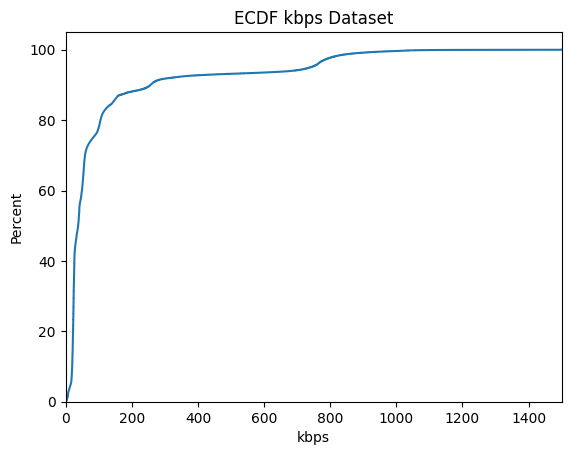

In [38]:
plt.figure()
f=sns.ecdfplot(
    data = df,
    x = 'kbps' ,
    stat='percent'
)
f.set(xlim=(-.1, 1500))
plt.title('ECDF kbps Dataset')

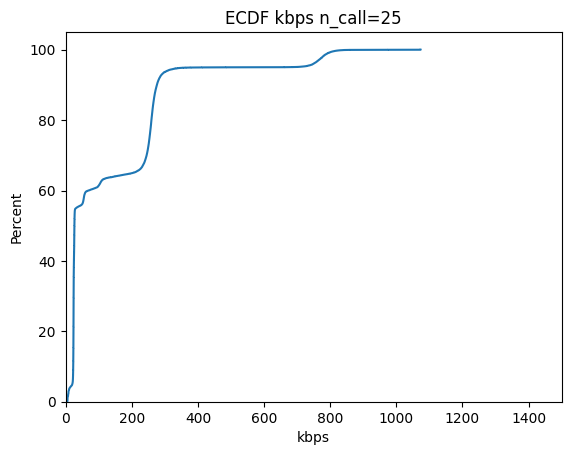

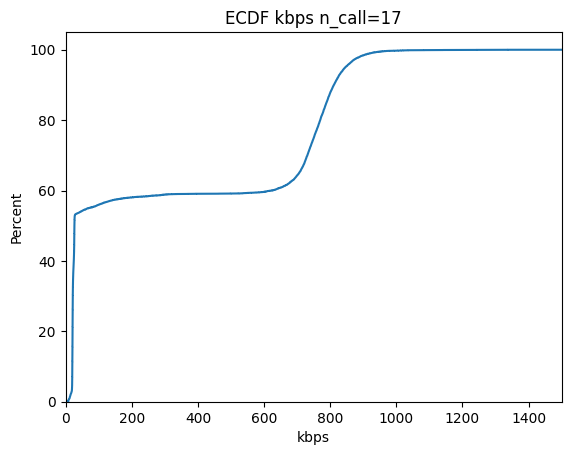

In [39]:
# Jitsi
h=sns.ecdfplot(
    data = kbps_jitsi[0],
   
    stat='percent'
)
h.set(xlim=(-.1, 1500))
plt.title(f'ECDF kbps n_call={n_call_jitsi[0]}')
plt.xlabel('kbps')
plt.show()
l=sns.ecdfplot(
    data = kbps_jitsi[1],
   
    stat='percent'
)
l.set(xlim=(-.1, 1500))
plt.title(f'ECDF kbps n_call={n_call_jitsi[1]}')
plt.xlabel('kbps')
plt.show()

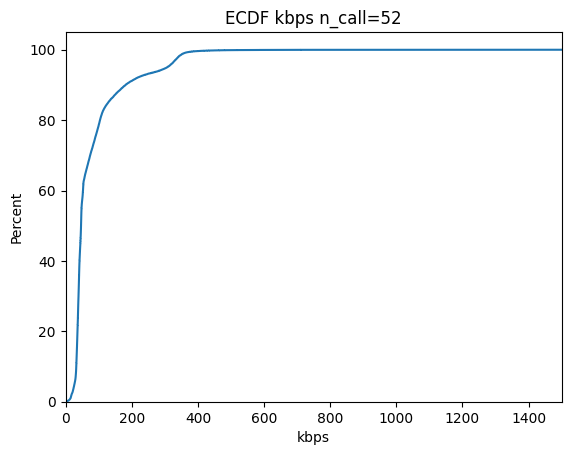

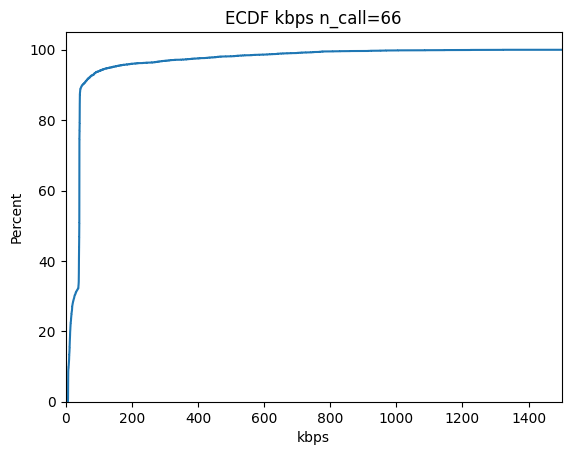

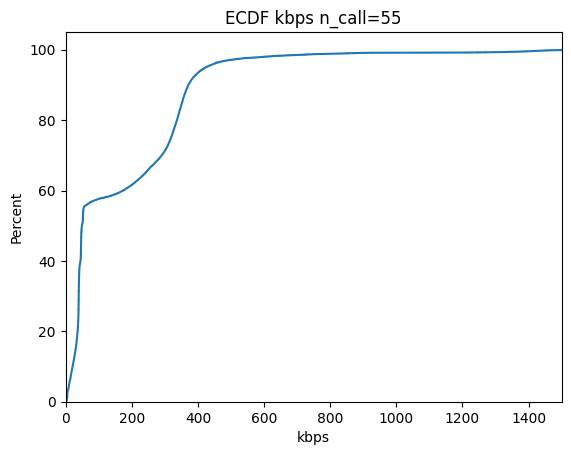

In [40]:
# Webex
h=sns.ecdfplot(
    data = kbps_webex[0],
   
    stat='percent'
)
h.set(xlim=(-.1, 1500))
plt.title(f'ECDF kbps n_call={n_call_webex[0]}')
plt.xlabel('kbps')
plt.show()
l=sns.ecdfplot(
    data = kbps_webex[1],
   
    stat='percent'
)
l.set(xlim=(-.1, 1500))
plt.title(f'ECDF kbps n_call={n_call_webex[1]}')
plt.xlabel('kbps')
plt.show()
l=sns.ecdfplot(
    data = kbps_webex[2],
   
    stat='percent'
)
l.set(xlim=(-.1, 1500))
plt.title(f'ECDF kbps n_call={n_call_webex[2]}')
plt.xlabel('kbps')
plt.show()

### <ins> Point 7. </ins>

### <ins>Is the correlation threshold of 0.85/0.9 reasonable?</ins>

In [13]:
correlation_matrix = df[stat_feat].corr().abs()

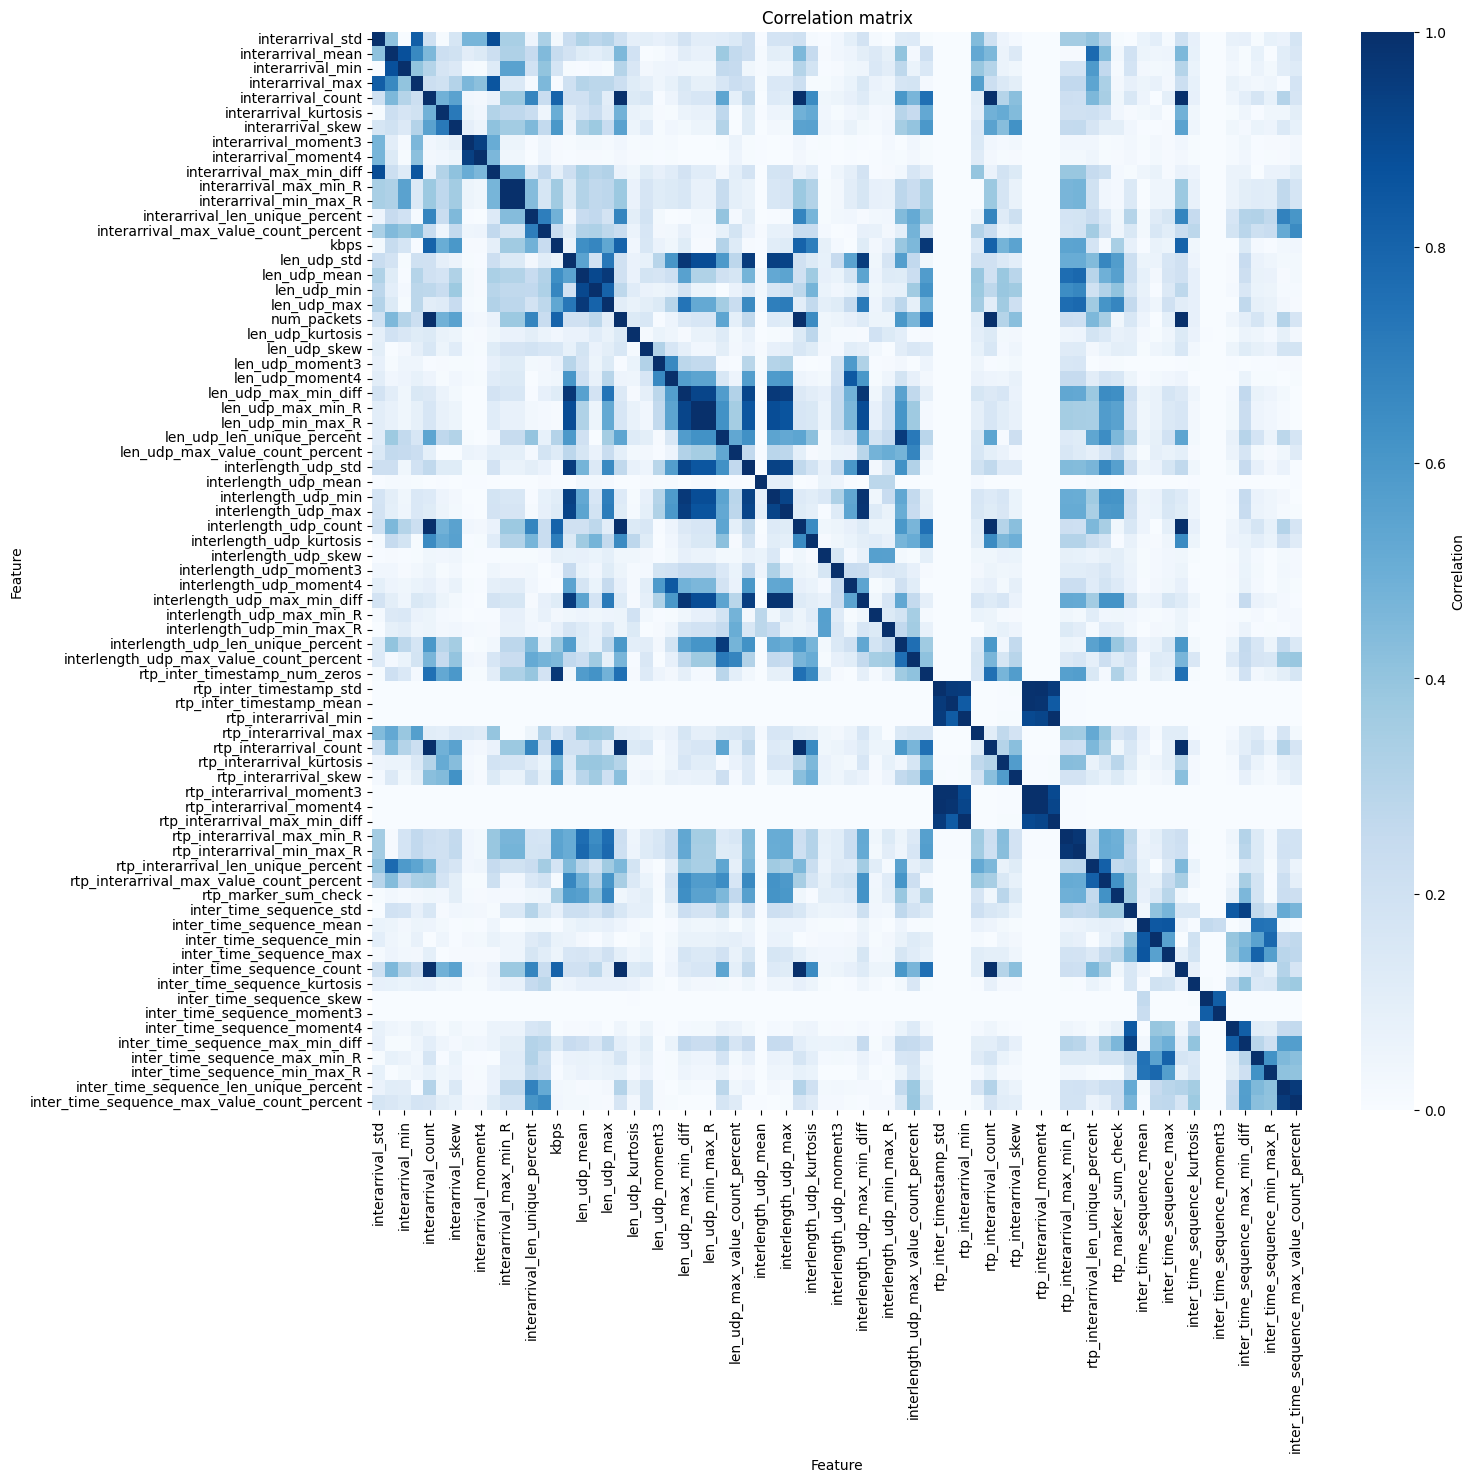

In [14]:
# Compute the heatmap
plt.figure(figsize=(15,14))
sns.heatmap(correlation_matrix, cmap='Blues', annot=False, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'})
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

### Below we decided to remove the features with correlation higher that 0.9, where this value was initially 0.85 but due to ML tasks in Section 2, we decide to increase this threshold to improve the performance of these latter methods

In [15]:
c = correlation_matrix[correlation_matrix > 0.9]
s = c.stack()
so = s.sort_values(ascending=False).reset_index()

# Get strongly correlatead features, removing pairs having correlation = 1 because of the diagonal, i.e., correlation between one feature and itself
so = so[(so[0].isnull()==False) & (so["level_0"] != so["level_1"])]
to_be_deleted = []
candidates = list(so["level_0"])

# Get the unique set of features to be deleted
# Notice that we discard one feature per time considering the case where a feature is strongly correlated with multiple features
subset_so = so
for candidate in candidates:
    if (candidate in list(subset_so["level_0"])): 
        to_be_deleted.append(candidate) # add the feature to the removed candidates
        subset_so = subset_so[(subset_so["level_0"] != candidate) & (subset_so["level_1"] != candidate)] # remove the rows that the removed feature is involved

print(len(to_be_deleted), 'features to be removed')

25 features to be removed


In [16]:
stat_feat = list(stat_feat)
for ele in to_be_deleted:
    stat_feat.remove(ele)


In [17]:
df =df.drop(to_be_deleted, axis=1)
correlation_matrix = df[stat_feat].corr().abs()

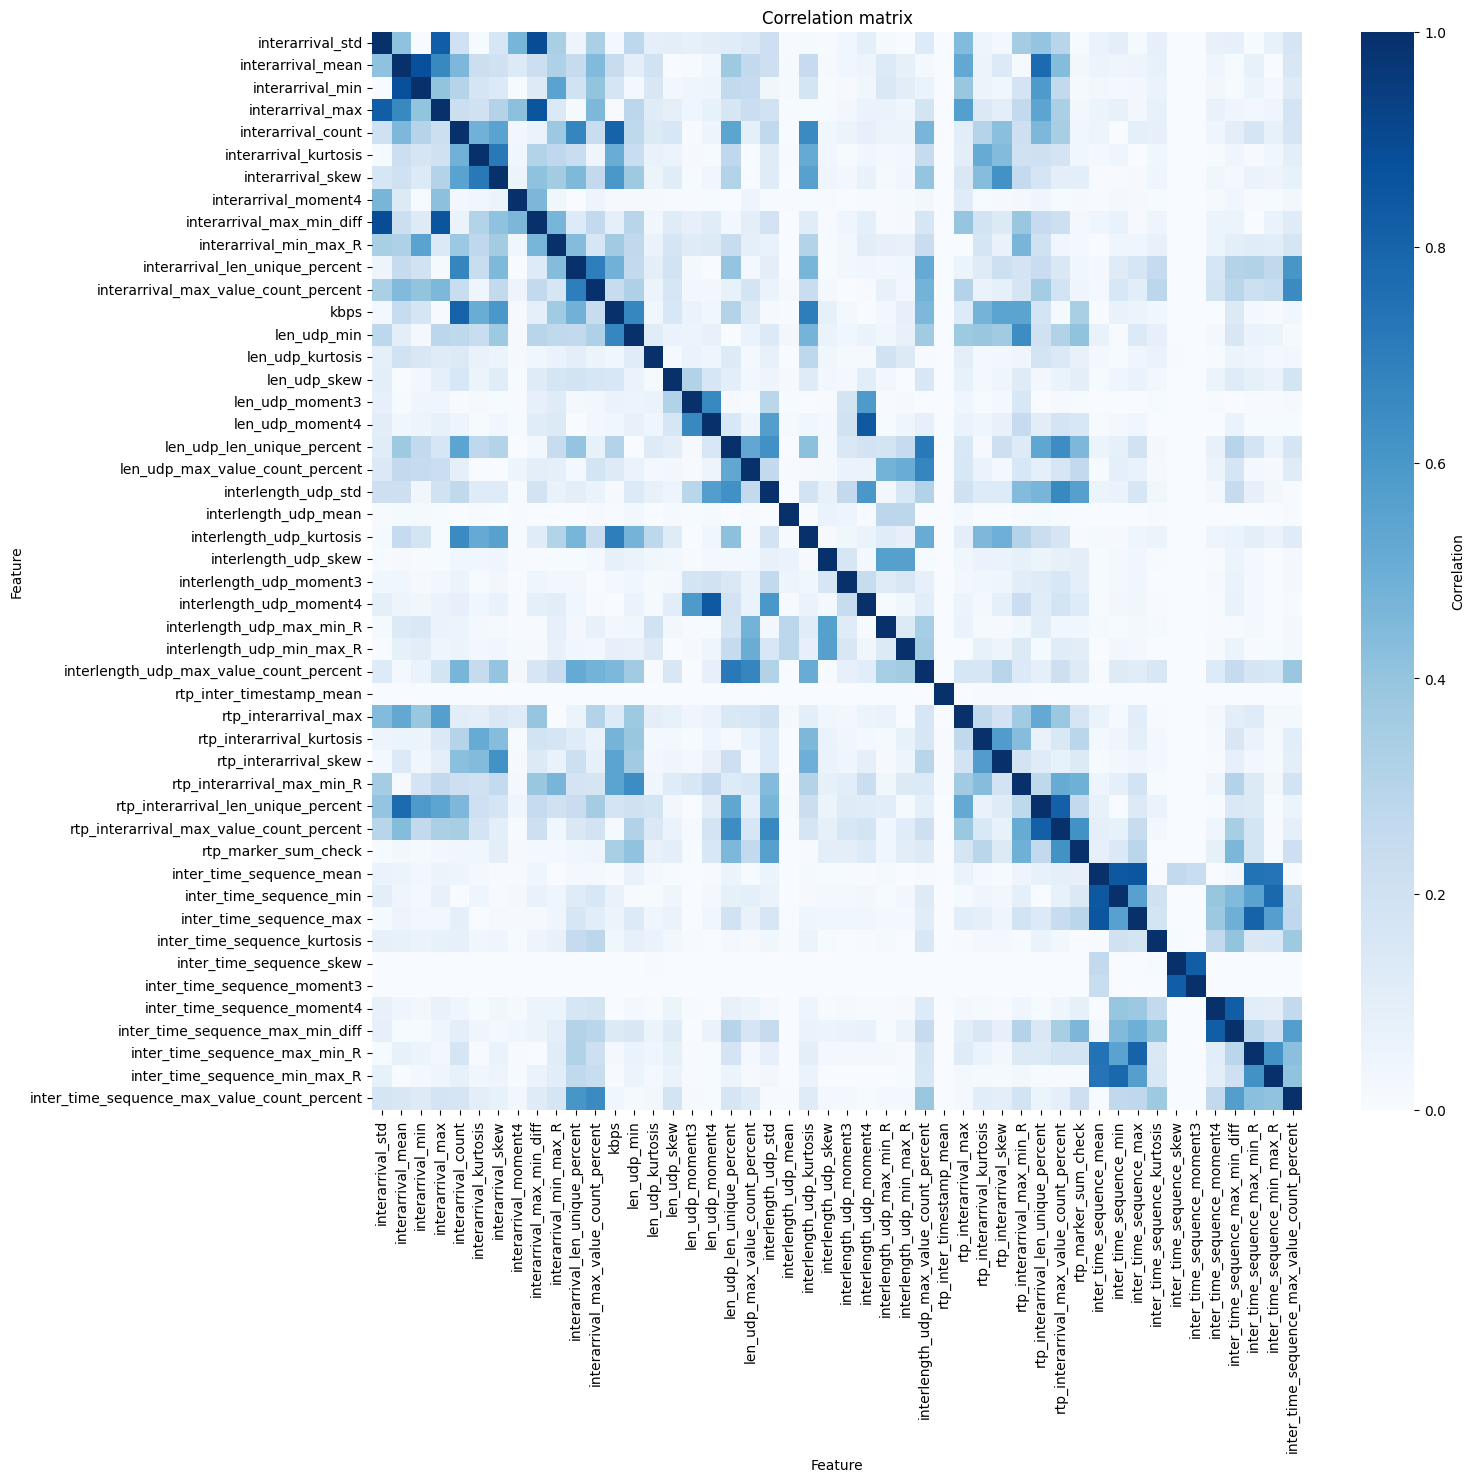

In [18]:
# Compute the heatmap
plt.figure(figsize=(15,14))
sns.heatmap(correlation_matrix, cmap='Blues', annot=False, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'})
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

In [19]:
import pickle

with open('my_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)

In [20]:
with open('my_stat_feat.pickle', 'wb') as output:
    pickle.dump(stat_feat, output)

In [1]:
print('End')

End
